## PODS Lab 10 - Images

In [1]:
!pip install ismember

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from urllib.request import urlopen
from skimage import data, io, filters
from PIL import Image
import matplotlib.cm as cm
from skimage import measure
from skimage import morphology 
from PIL import ImageFont
from PIL import ImageDraw

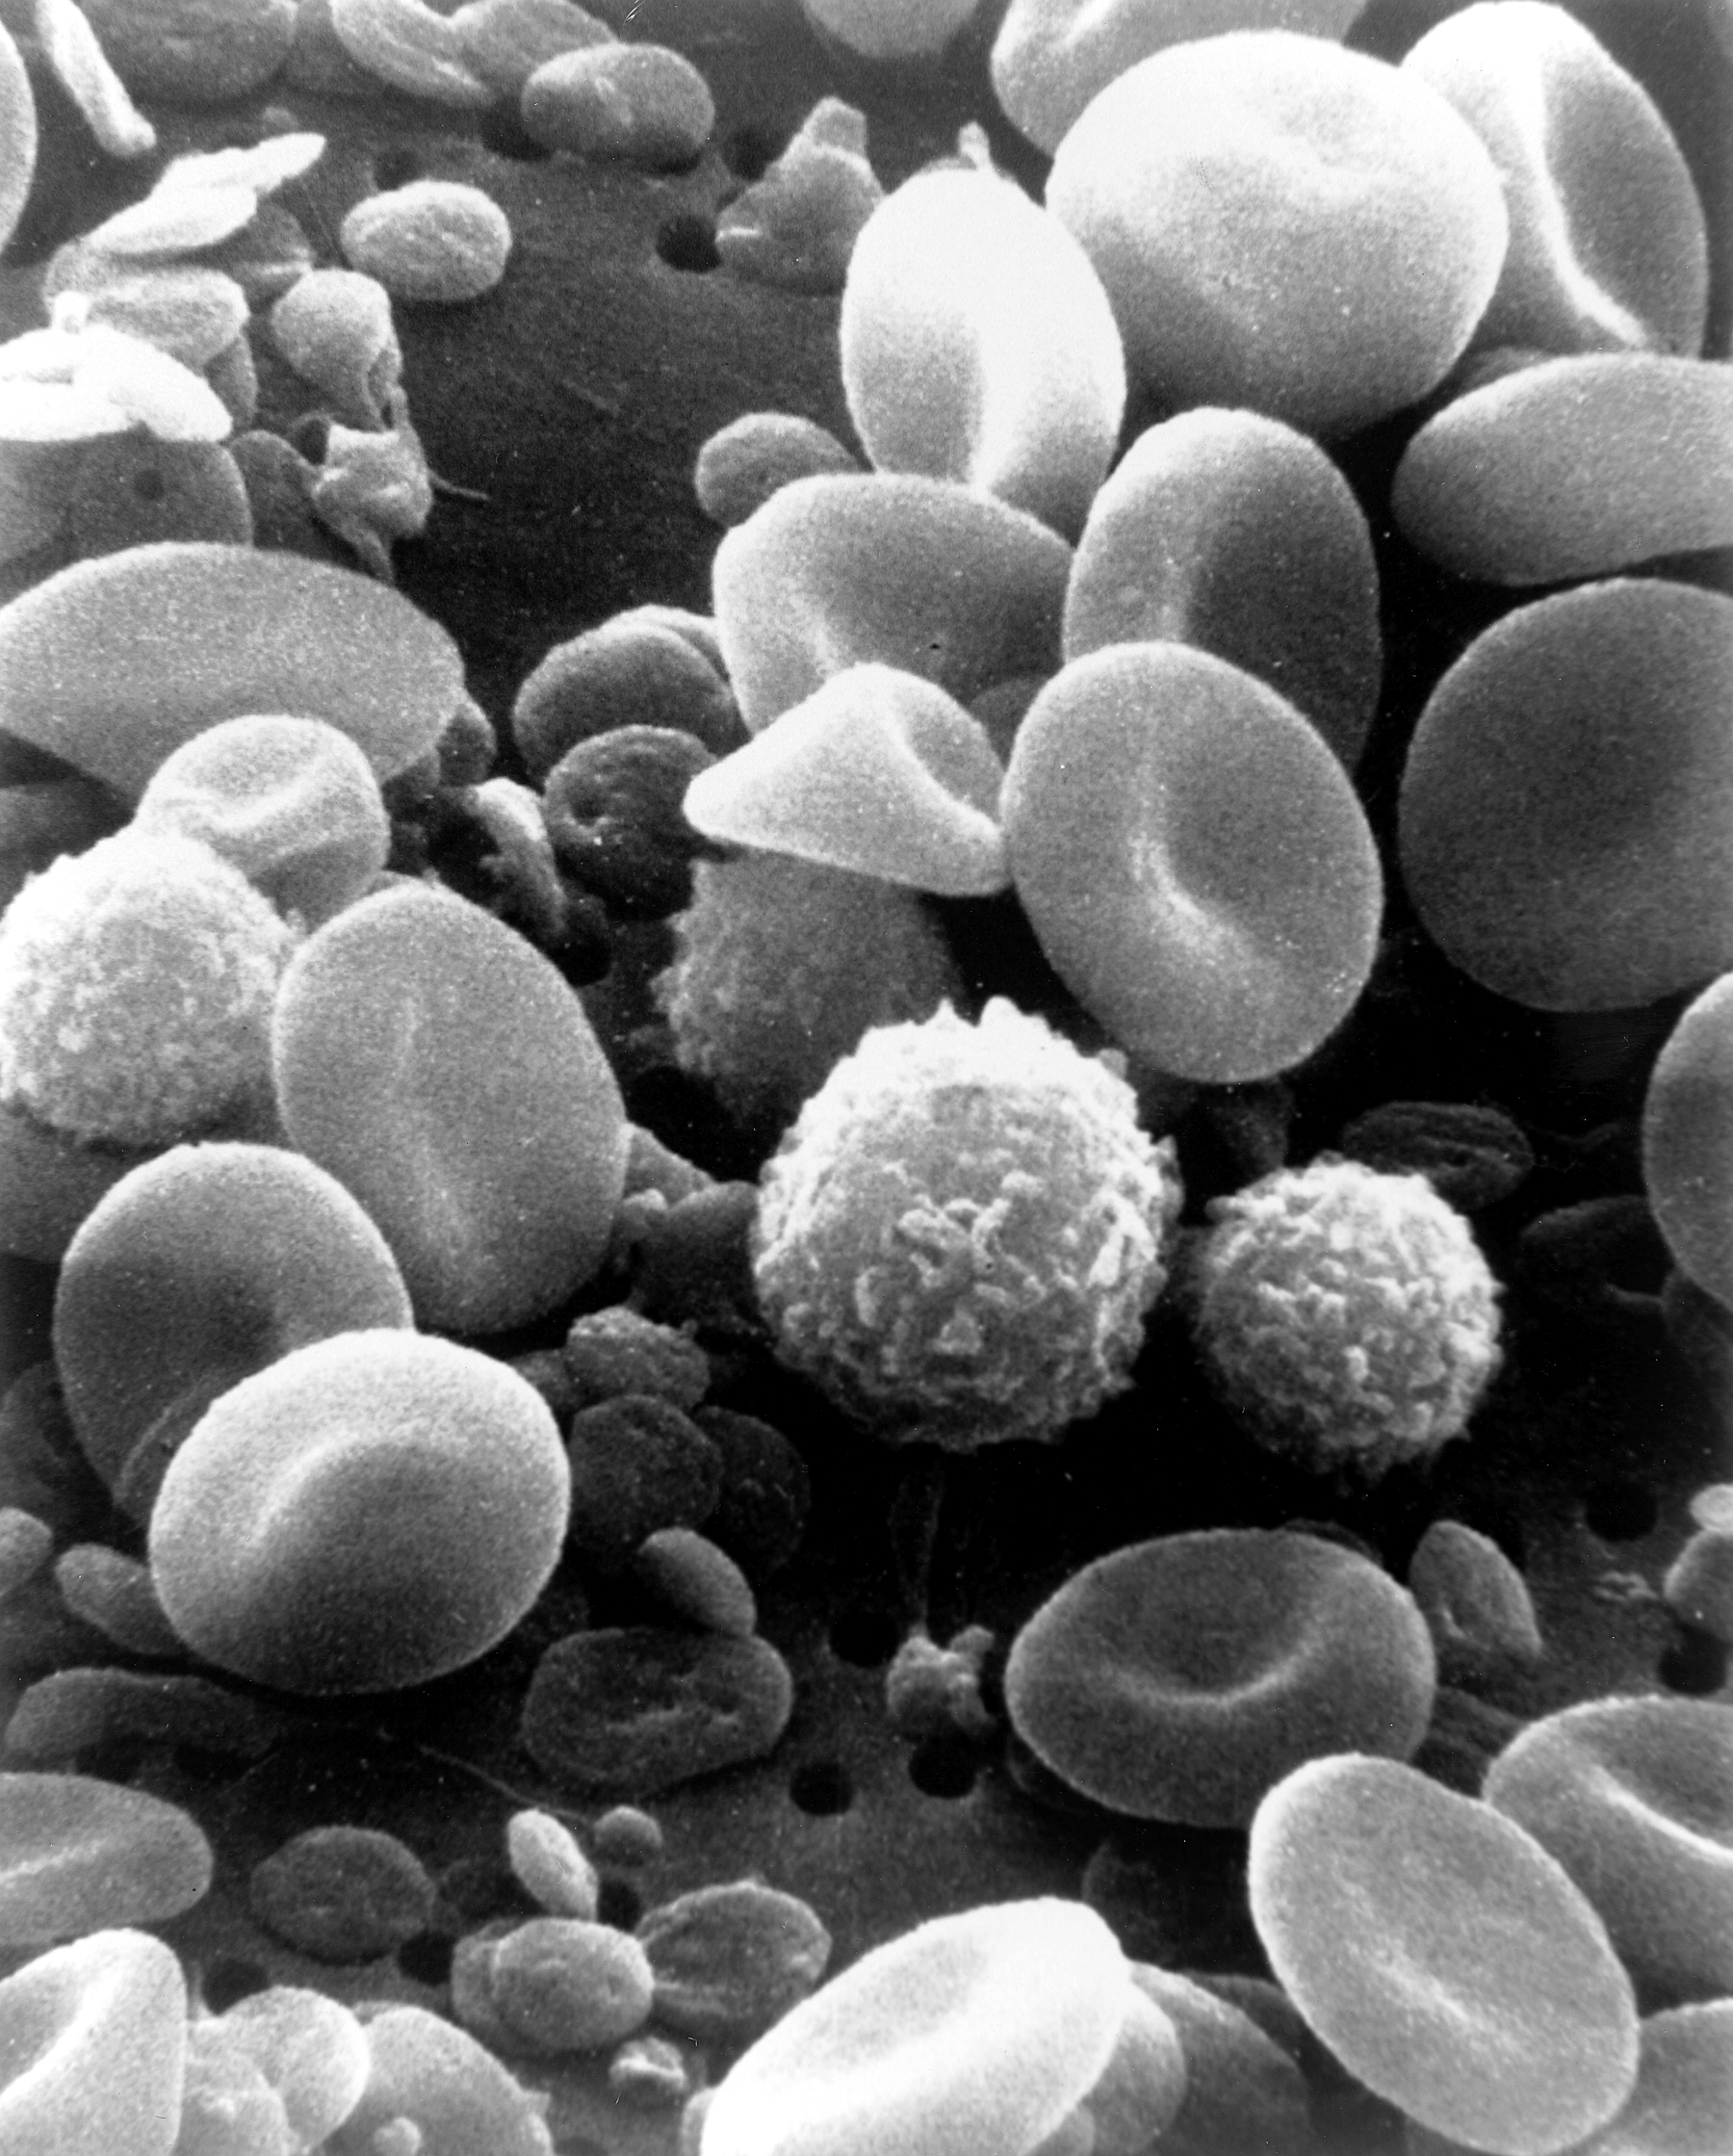

In [18]:
# Downloading an image from the website as a jpeg into pyhon is possible with urlopen
URL = "https://upload.wikimedia.org/wikipedia/commons/8/82/SEM_blood_cells.jpg"
img_1 = Image.open(urlopen(URL))
img_1

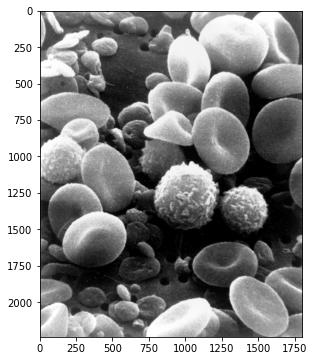

In [19]:
# Using matplotlib to look at red blood cells and white blood cells
plt.figure(figsize = (11, 6))
plt.imshow(img_1)

In [20]:
im_1 = np.array(img_1)
print(im_1.shape, im_1.dtype)

(2239, 1800, 3) uint8


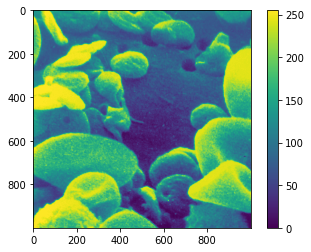

In [21]:
# Use a color bar plot to display the image, now we have this converted to a numpy array
plt.imshow(im_1[0:1000, 0:1000, 0])
plt.colorbar()

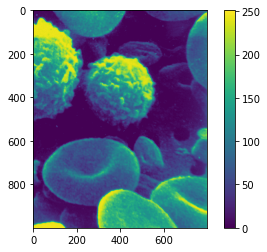

In [22]:
# Coloured image changing up the pixels
plt.imshow(im_1[1000: 2000, 1000: 2000, 0])
plt.colorbar()

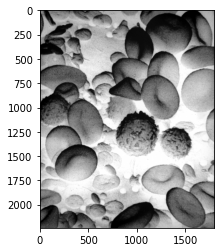

In [40]:
#Negative Images
img_1_neg = 255 - np.array(img_1)
plt.imshow(img_1_neg)

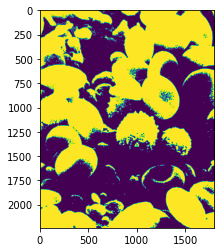

In [50]:
numpy_data1 = np.asarray(img_1)
img_1_thresh = numpy_data1[:, :, 0] > 100
plt.imshow(img_1_thresh)

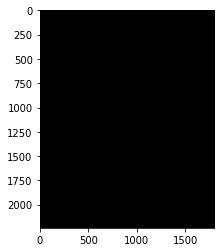

In [43]:
img_li = im_1[:, :, 0].copy()

img_li[img_li > 0] = 0

plt.imshow(img_li, cmap='gray')  # You can specify the colormap as 'gray' or any other colormap
plt.show()

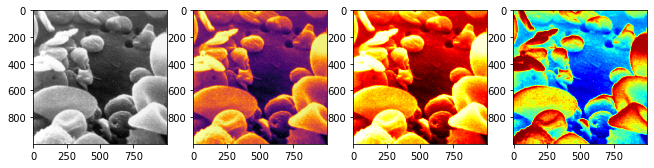

In [24]:
fig = plt.figure(figsize = (11, 6))
fig.add_subplot(1,4,1)
plt.imshow(im_1[0: 1000, 0: 1000, 0], cmap = cm.gray)
fig.add_subplot(1,4,2)
plt.imshow(im_1[0: 1000, 0: 1000, 0], cmap = cm.inferno)
fig.add_subplot(1,4,3)
plt.imshow(im_1[0: 1000, 0: 1000, 0], cmap = cm.hot)
fig.add_subplot(1,4,4)
plt.imshow(im_1[0:1000, 0:1000, 0], cmap = cm.jet)

We can manipulate colours of the image; this involves changing the values of the RGB channels separately.

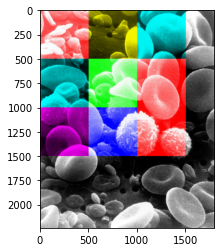

In [29]:
im_1[0: 500, 0: 500, 0] = 250
im_1[500: 1000, 0: 500, 0] = 0
im_1[1000: 1500, 0: 500, 1] = 0
im_1[0: 500, 500: 1000, 2] = 0
im_1[500: 1000, 500: 1000, 1] = 250
im_1[1000: 1500, 500: 1000, 2] = 250
im_1[0: 500, 1000: 1500, 0] = 0
im_1[500: 1000, 1000: 1500, 0] = 250
im_1[1000: 1500, 1000: 1500, 0] = 250

plt.imshow(im_1)

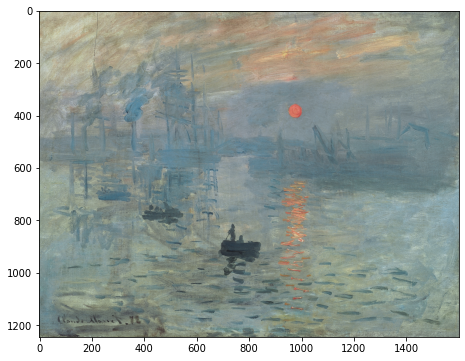

In [32]:
target_url = 'https://upload.wikimedia.org/wikipedia/commons/5/54/Claude_Monet%2C_Impression%2C_soleil_levant.jpg'
im_col = Image.open(urlopen(target_url))

plt.figure(figsize = (11, 6))
plt.imshow(im_col)

In [33]:
im_cola = np.array(im_col)
print(im_cola.shape, im_cola.dtype)
im_cola[0, 0]

(1245, 1600, 3) uint8


array([201, 196, 174], dtype=uint8)

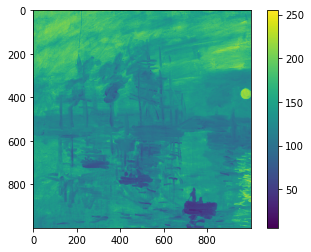

In [36]:
plt.imshow(im_cola[0: 1000, 0: 1000, 0])
plt.colorbar()

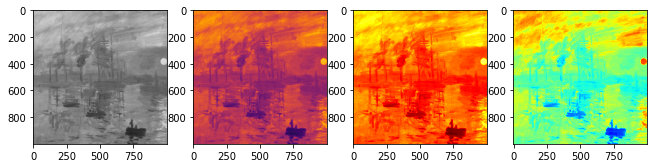

In [38]:
fig2 = plt.figure(figsize = (11, 6))
fig2.add_subplot(1, 4, 1)
plt.imshow(im_cola[0: 1000, 0: 1000, 0], cmap = cm.gray)
fig2.add_subplot(1, 4, 2)
plt.imshow(im_cola[0: 1000, 0: 1000, 0], cmap = cm.inferno)
fig2.add_subplot(1, 4, 3)
plt.imshow(im_cola[0: 1000, 0: 1000, 0], cmap = cm.hot)
fig2.add_subplot(1, 4, 4)
plt.imshow(im_cola[0: 1000, 0: 1000, 0], cmap = cm.jet)

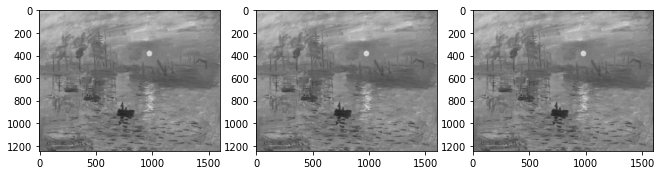

In [39]:
fig3 = plt.figure(figsize=(11, 6))
ax311 = fig3.add_subplot(1, 3, 1)
plt.imshow(im_cola[:, :, 0], cmap = cm.gray)
ax312 = fig3.add_subplot(1, 3, 2)
plt.imshow(im_cola[:, :, 0], cmap = cm.gray)
ax313 = fig3.add_subplot(1, 3, 3)
plt.imshow(im_cola[:, :, 0], cmap = cm.gray)

## Basic Image Manipulation

In [ ]:
im3 = np.array(img_1)
im4 = im3[:, :, 0]

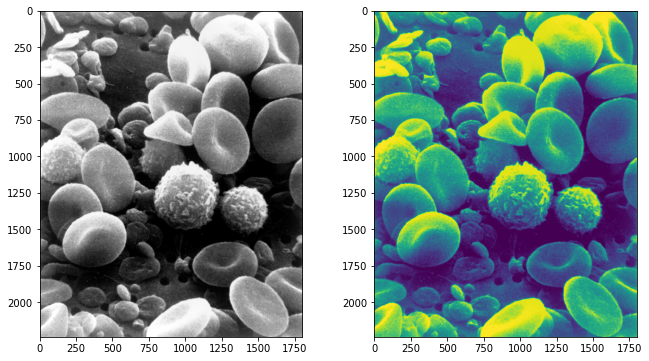

In [55]:
fig4 = plt.figure(figsize = (11, 6))

ax10 = fig4.add_subplot(1,2,1)
plt.imshow(im3)

ax11 = fig4.add_subplot(1,2,2)
plt.imshow(im4)

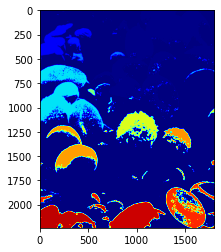

In [69]:
# How many regions are there: this is a good way of being able to differ between different regions in terms of 
# pixel intensity
from skimage import measure
im5 = measure.label(im4>150)
# The purpose of this is to identify label connected componenets or regions within the image, where the pixel
# values are greater than 150.
plt.imshow(im5, cmap = cm.jet)

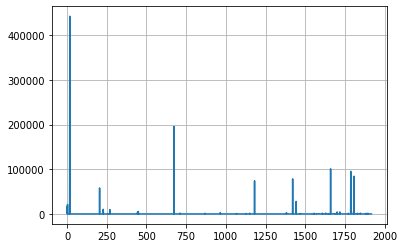

In [70]:
# Here are the property differences in the different regions
numLabels = np.max(im5) #total number of different regions

im5_properties = measure.regionprops(im5) # computes the list of properties for each labeled region in the image

areaRegions = np.zeros(numLabels) # store the areas of labelled regions

for i in range(numLabels):
    areaRegions[i] = im5_properties[i].area
    
plt.plot((areaRegions))
plt.grid()

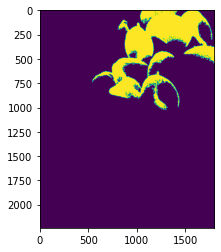

In [71]:
plt.imshow(im5 == 18)

To remove some of the regions, we use the library ismember.

In [72]:
from ismember import ismember

In [74]:
# Calculating the number of large regions within the image (regions where the area is greater than 10000 pixels)
numLargeRegions = sum(areaRegions > 10000)

In [75]:
# This creates an array of zeros, stored as 0s
largeRegions = np.zeros(numLargeRegions)
# k = 0, this is when largeRegions array is incremented by a counter "k"
k = 0
for i in range(numLabels):
    if (areaRegions[i] > 10000):
        largeRegions[k] = i
        k = k + 1
# When we iterate through the different regions within the image, whenever there is a region greater than 10000
# this is stored as 1 in the numLargeRegions array.

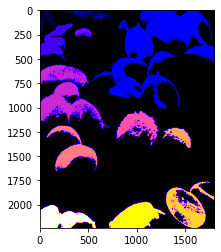

In [80]:
# The large regions are greater than 1, and we can measure this by iterating through the images, ismember is used
# to select the images when moving through the numpy array with 0s and 1s
im6 = ismember(im5, largeRegions+1)
# measure_label is used to label the connected components in the binary image where the region belongs to the large
# regions (labelled by greater than 0)
im7 = measure.label(im6[0]>0)
plt.imshow(im7, cmap = cm.gnuplot2)

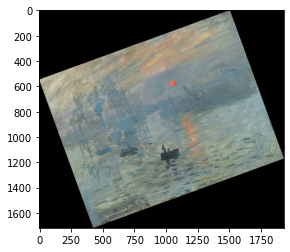

In [79]:
import scipy
im_col_rot = scipy.ndimage.interpolation.rotate(im_col, 20)
plt.imshow(im_col_rot)

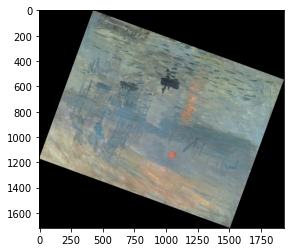

In [81]:
plt.imshow(im_col_rot[::-1, :, :])

## Detecting the specific regions of the image

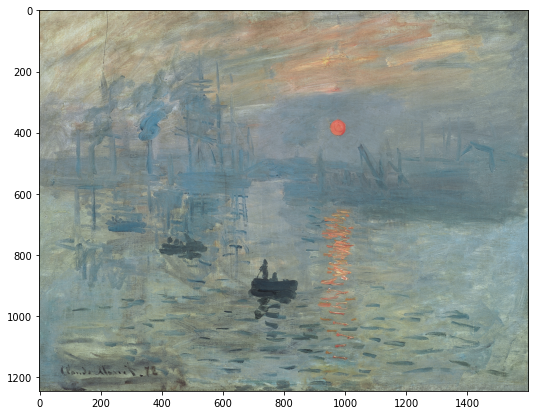

In [83]:
target_url = 'https://upload.wikimedia.org/wikipedia/commons/5/54/Claude_Monet%2C_Impression%2C_soleil_levant.jpg'
im_col = Image.open(urlopen(target_url))
plt.figure(figsize = (10,7))
plt.imshow(im_col)

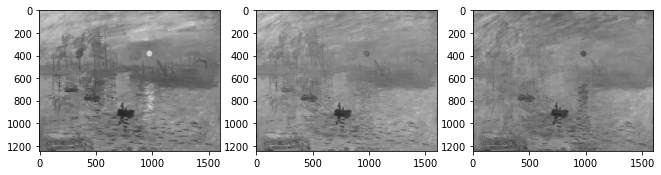

In [85]:
im_col2 = np.array(im_col)
fig5 = plt.figure(figsize = (11, 6))
ax511 = fig5.add_subplot(1, 3, 1)
plt.imshow(im_col2[:, :, 0], cmap = cm.gray)
ax512 = fig5.add_subplot(1, 3, 2)
plt.imshow(im_col2[:, :, 1], cmap = cm.gray)
ax513 = fig5.add_subplot(1, 3, 3)
plt.imshow(im_col2[:, :, 2], cmap = cm.gray)


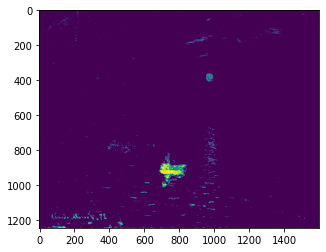

In [86]:
sun = (im_col2[:,:,0]>210);
boat = (im_col2[:,:,2]<75);

plt.imshow(sun+2*boat)

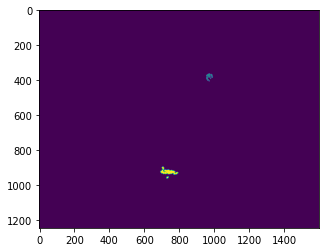

In [91]:
sun2 = morphology.opening(sun,morphology.disk(3))
boat2 = morphology.opening(boat,morphology.disk(4))
plt.imshow(sun2+2*boat2)

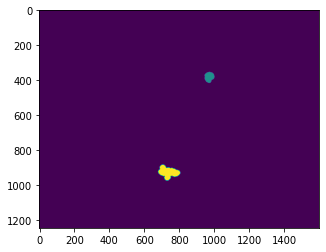

In [92]:
sun3 = morphology.dilation (sun2,morphology.disk(9))
boat3 = morphology.dilation(boat2,morphology.disk(12))
plt.imshow(sun3+2*boat3)

In [96]:

sun_properties = measure.regionprops( measure.label(sun3))
boat_properties = measure.regionprops( measure.label(boat3))
print(sun_properties[0].centroid,boat_properties[0].centroid)

(382.50802348336595, 972.4724070450097) (926.8011442709138, 738.4059069120149)


In [99]:
draw = ImageDraw.Draw(im_col)
# use a truetype font
#font = ImageFont.truetype("arial.ttf", 70)

draw.text((sun_properties[0].centroid[1],sun_properties[0].centroid[0]),"The Sun",font=font)
draw.text((boat_properties[0].centroid[1],boat_properties[0].centroid[0]),"The Boat",font=font)
plt.imshow(im_col)

OSError: cannot open resource